In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/INFO555/Project2/v3/annotation_data.csv'
df = pd.read_csv(file_path)

In [ ]:
from sklearn.metrics import cohen_kappa_score

df['Annotation1'] = df['Annotation1'].astype(str)
df['Annotation2'] = df['Annotation2'].astype(str)

sentiment_data = df[df['Category'] == 'Sentiment']

# Cohen's Kappa for Sentiment category
kappa_sentiment = cohen_kappa_score(sentiment_data['Annotation1'], sentiment_data['Annotation2'])
print(f"Cohen's Kappa for Sentiment category: {kappa_sentiment}")

job_data = df[df['Category'] == 'Job Role']

# Cohen's Kappa for Job Role category
kappa_job = cohen_kappa_score(job_data['Annotation1'], job_data['Annotation2'])
print(f"Cohen's Kappa for Job Role category: {kappa_job}")

Cohen's Kappa for Sentiment category: 0.78693967902601
Cohen's Kappa for Job Role category: 0.8592964824120604


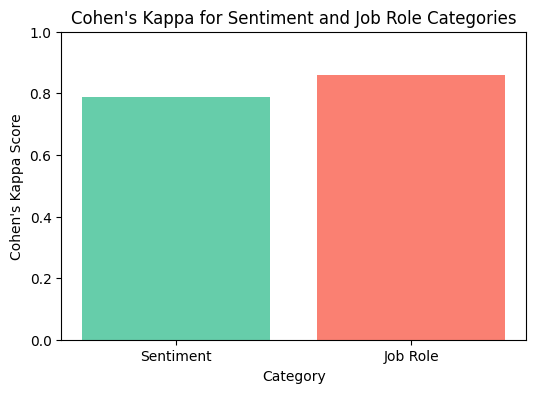

In [ ]:
import matplotlib.pyplot as plt

kappa_scores = {
    'Sentiment': kappa_sentiment,
    'Job Role': kappa_job
}

plt.figure(figsize=(6, 4))
plt.bar(kappa_scores.keys(), kappa_scores.values(), color=['#66CDAA', '#FA8072'])
plt.title("Cohen's Kappa for Sentiment and Job Role Categories")
plt.xlabel('Category')
plt.ylabel("Cohen's Kappa Score")
plt.ylim(0, 1)
plt.show()

In [ ]:
def calculate_agreement(data, category_values):
    agreement_data = []
    for value in category_values:
        value_data = data[(data['Annotation1'] == value) & (data['Annotation2'] == value)]
        total = data[(data['Annotation1'] == value) | (data['Annotation2'] == value)].shape[0]
        percentage = (value_data.shape[0] / total * 100) if total > 0 else 0
        agreement_data.append([value, percentage])
    return pd.DataFrame(agreement_data, columns=['Value', 'Agreement (%)'])

# observed agreement for Sentiment category
sentiment_data = df[df['Category'] == 'Sentiment']
sentiment_values = ['Positive', 'Negative', 'Neutral']
sentiment_agreement = calculate_agreement(sentiment_data, sentiment_values)

# observed agreement for Job Role category
job_data = df[df['Category'] == 'Job Role']
job_values = ['Data Scientist', 'Data Engineer', 'ML Engineer']
job_agreement = calculate_agreement(job_data, job_values)

print("Observed Agreement for Sentiment Category:")
print(sentiment_agreement)

print("\n Observed Agreement for Job Role Category:")
print(job_agreement)

Observed Agreement for Sentiment Category:
      Value  Agreement (%)
0  Positive      80.000000
1  Negative      82.692308
2   Neutral      52.941176

 Observed Agreement for Job Role Category:
            Value  Agreement (%)
0  Data Scientist      93.220339
1   Data Engineer      74.418605
2     ML Engineer      78.431373


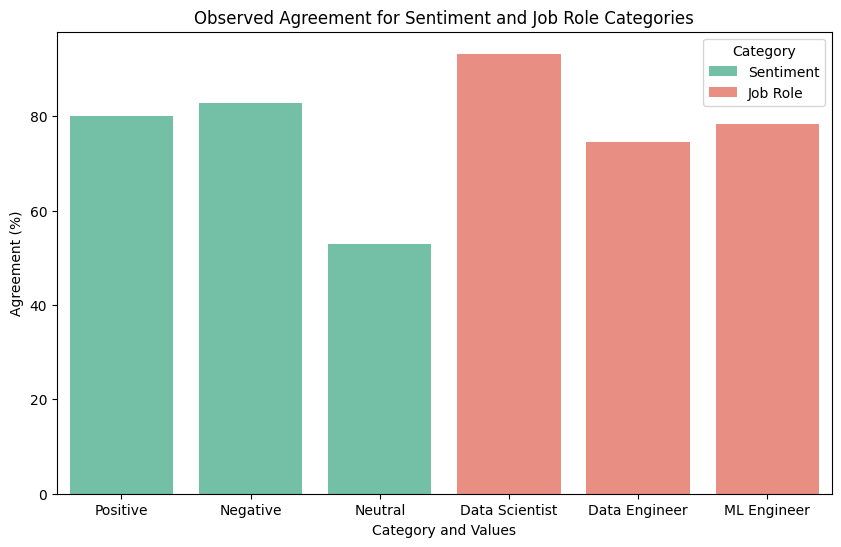

In [ ]:
sentiment_agreement['Category'] = 'Sentiment'
job_agreement['Category'] = 'Job Role'

combined_agreement = pd.concat([sentiment_agreement, job_agreement])

custom_palette = {'Sentiment': '#66CDAA', 'Job Role': '#FA8072'}

plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Agreement (%)', data=combined_agreement, hue='Category', palette=custom_palette)

plt.title("Observed Agreement for Sentiment and Job Role Categories")
plt.xlabel("Category and Values")
plt.ylabel("Agreement (%)")

plt.show()

In [ ]:
# accuracy
def calculate_accuracy(data):
    correct_predictions = data['Annotation1'] == data['Annotation2']
    accuracy = correct_predictions.mean() * 100
    return accuracy

sentiment_data = df[df['Category'] == 'Sentiment']
sentiment_accuracy = calculate_accuracy(sentiment_data)
print(f"Accuracy for Sentiment Category: {sentiment_accuracy:.2f}%")

job_data = df[df['Category'] == 'Job Role']
job_accuracy = calculate_accuracy(job_data)
print(f"Accuracy for Job Role Category: {job_accuracy:.2f}%")

Accuracy for Sentiment Category: 87.27%
Accuracy for Job Role Category: 90.71%


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# confusion matrix
def compute_confusion_matrix(data, category, true_col, pred_col, labels):
    true_values = data[true_col]
    pred_values = data[pred_col]

    conf_matrix = confusion_matrix(true_values, pred_values, labels=labels)

    conf_matrix_df = pd.DataFrame(conf_matrix,
                                  index=[f'Annotation1: {label}' for label in labels],
                                  columns=[f'Annotation2: {label}' for label in labels])

    return conf_matrix_df

# confusion matrix for Sentiment category
sentiment_data = df[df['Category'] == 'Sentiment']
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_conf_matrix = compute_confusion_matrix(sentiment_data, 'Sentiment', 'Annotation1', 'Annotation2', sentiment_labels)

print("Confusion Matrix for Sentiment Category:")
print(sentiment_conf_matrix)

# confusion matrix for Job Role category
job_data = df[df['Category'] == 'Job Role']
job_labels = ['Data Scientist', 'Data Engineer', 'ML Engineer']
job_conf_matrix = compute_confusion_matrix(job_data, 'Job Role', 'Annotation1', 'Annotation2', job_labels)

print("\nConfusion Matrix for Job Role Category:")
print(job_conf_matrix)

Confusion Matrix for Sentiment Category:
                       Annotation2: Positive  Annotation2: Negative  \
Annotation1: Positive                     44                      6   
Annotation1: Negative                      0                     43   
Annotation1: Neutral                       5                      0   

                       Annotation2: Neutral  
Annotation1: Positive                     0  
Annotation1: Negative                     3  
Annotation1: Neutral                      9  

Confusion Matrix for Job Role Category:
                             Annotation2: Data Scientist  \
Annotation1: Data Scientist                           55   
Annotation1: Data Engineer                             0   
Annotation1: ML Engineer                               2   

                             Annotation2: Data Engineer  \
Annotation1: Data Scientist                           2   
Annotation1: Data Engineer                           32   
Annotation1: ML Engineer       

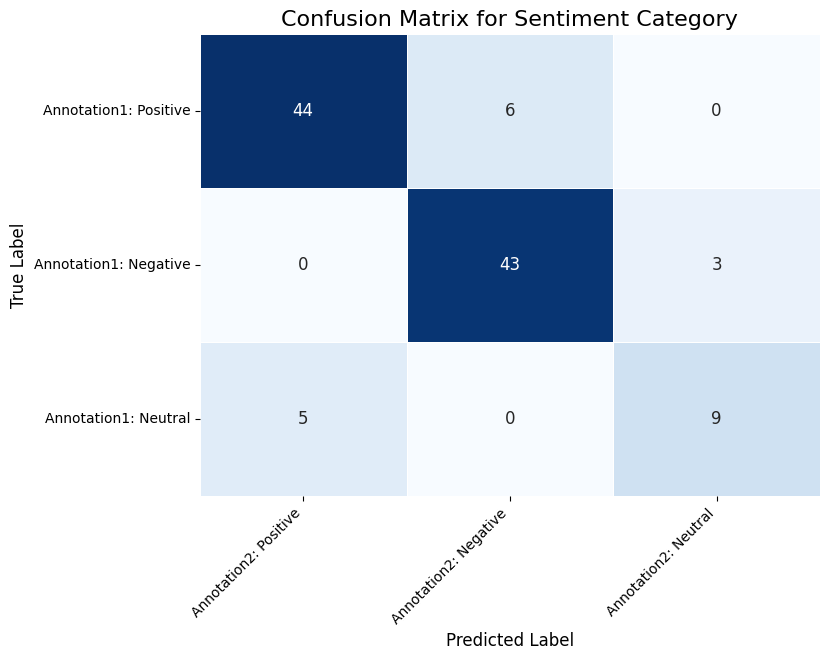

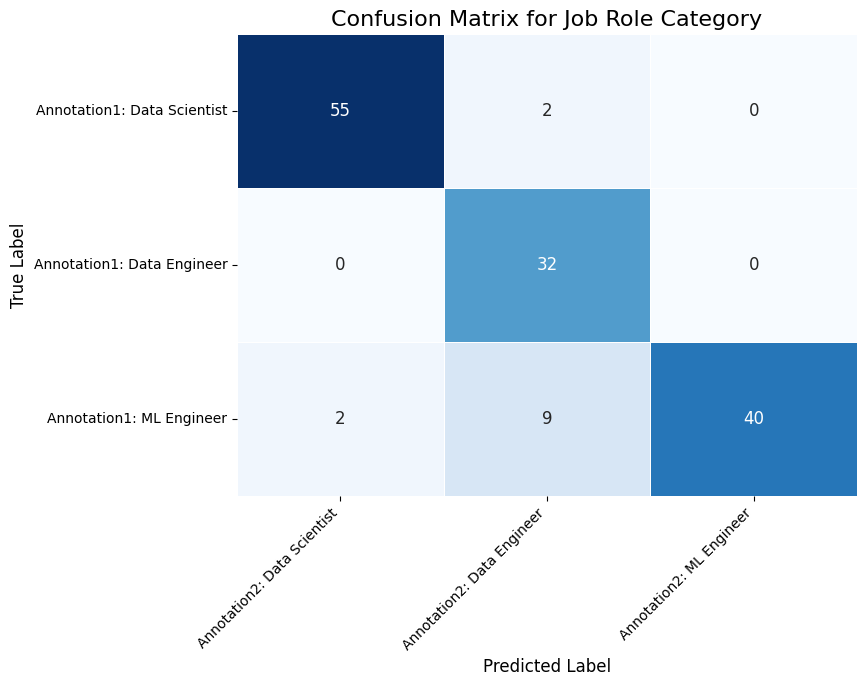

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(conf_matrix_df, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues', cbar=False,
                annot_kws={'size': 12}, linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

plot_confusion_matrix(sentiment_conf_matrix, 'Confusion Matrix for Sentiment Category')

plot_confusion_matrix(job_conf_matrix, 'Confusion Matrix for Job Role Category')

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# precision, recall, and F1-score
def compute_classification_metrics(data, category, true_col, pred_col, labels):
    category_data = data[data['Category'] == category]
    true_values = category_data[true_col]
    pred_values = category_data[pred_col]

    # classification report
    report = classification_report(true_values, pred_values, labels=labels, output_dict=True)

    report_df = pd.DataFrame(report).T.round(2)
    return report_df

# classification metrics for Sentiment category

sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_metrics = compute_classification_metrics(df, 'Sentiment', 'Annotation1', 'Annotation2', sentiment_labels)

print("Classification Metrics for Sentiment Category:")
print(sentiment_metrics)

# classification metrics for Job Role category

job_labels = ['Data Scientist', 'Data Engineer', 'ML Engineer']
job_metrics = compute_classification_metrics(df, 'Job Role', 'Annotation1', 'Annotation2', job_labels)

print("\nClassification Metrics for Job Role Category:")
print(job_metrics)

Classification Metrics for Sentiment Category:
              precision  recall  f1-score  support
Positive           0.90    0.88      0.89    50.00
Negative           0.88    0.93      0.91    46.00
Neutral            0.75    0.64      0.69    14.00
accuracy           0.87    0.87      0.87     0.87
macro avg          0.84    0.82      0.83   110.00
weighted avg       0.87    0.87      0.87   110.00

Classification Metrics for Job Role Category:
                precision  recall  f1-score  support
Data Scientist       0.96    0.96      0.96    57.00
Data Engineer        0.74    1.00      0.85    32.00
ML Engineer          1.00    0.78      0.88    51.00
accuracy             0.91    0.91      0.91     0.91
macro avg            0.90    0.92      0.90   140.00
weighted avg         0.93    0.91      0.91   140.00


<Figure size 1000x600 with 0 Axes>

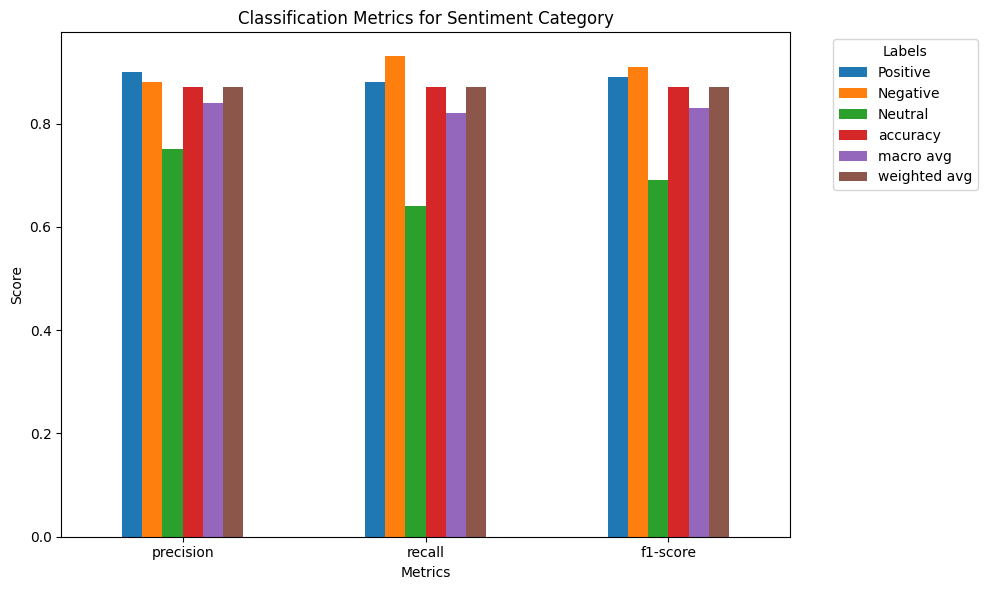

<Figure size 1000x600 with 0 Axes>

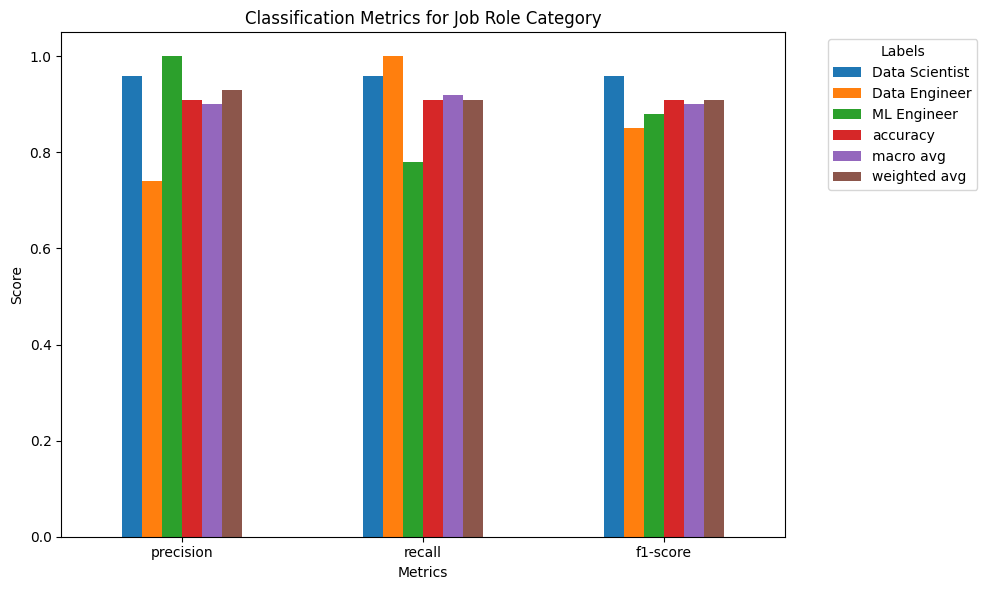

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# classification metrics
def visualize_classification_metrics(metrics_df, category):
    metrics_df = metrics_df.drop(columns=['support'])
    metrics_df = metrics_df.T

    plt.figure(figsize=(10, 6))
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Classification Metrics for {category} Category')
    plt.ylabel('Score')
    plt.xlabel('Metrics')
    plt.xticks(rotation=0)
    plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

visualize_classification_metrics(sentiment_metrics, 'Sentiment')

visualize_classification_metrics(job_metrics, 'Job Role')